```
### Random Acts of Pizza
### Sybil Santos-Burgan, Shane Kramer, Monali, Jose Torres
### 207 Final Project Scratchpad
### 03.28.22 - Further exploration for logistic regression model
```
---



In [2]:
import numpy as np 
import pandas as pd 
from pandas import json_normalize
import json 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Can configure the list below to filter columns from original training data set
test_cols = ['request_text', 'request_number_of_comments_at_retrieval', 'requester_received_pizza']

# Read JSON file
df = pd.read_json('/content/drive/MyDrive/W207/FinalProject/w207_final_project/src/data/train.json')

# For the entire training set, add column for request text count, create label obejct, 
# And purge the request_texct_count column from training data
full_df = df.copy()
full_df['request_text_count'] = df['request_text'].str.count(' ') + 1
full_labels = full_df['requester_received_pizza']
#full_df = full_df.drop('requester_received_pizza', axis=1)

# Not filtering columns for now
#filtered_df = df[test_cols]

dev_size=1000

# Build train and dev data sets
train_data, train_labels = full_df.request_text[dev_size:], full_labels[dev_size:]
dev_data, dev_labels = full_df.request_text[:dev_size], full_labels[:dev_size]

###################################################################
Going to look at correlation metrics to get an idea of what to     
regress on                                                         
###################################################################


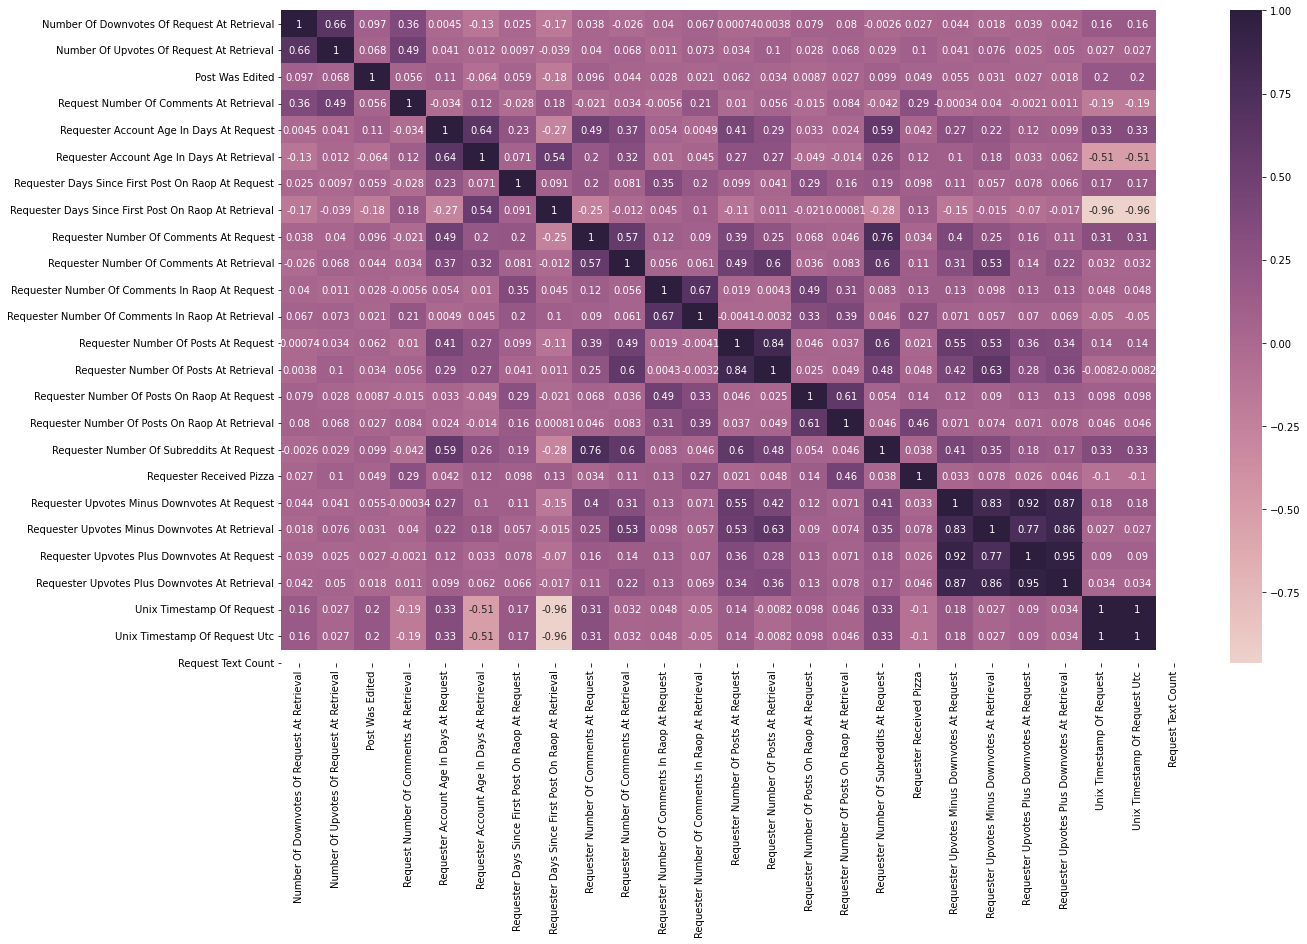

In [5]:
print("###################################################################")
print("Going to look at correlation metrics to get an idea of what to     ")
print("regress on                                                         ")
print("###################################################################")

h_labels = [x.replace('_', ' ').title() for x in 
            list(full_df.select_dtypes(include=['number', 'bool']).columns.values)]
fig, ax = plt.subplots(figsize=(20,12))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, 
                cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

Looks like we could use (>.1):

*   Request text count
*   Number of upvotes of request at retrieval =.1
*   Request Number of Comments at Retrieval = .29
*   Requester Account Age in Days at Retrieval =.12
*   Requested Days Since First Post on Raop at Retrieval =.13
*   Requester Number of Comments at Retrieval = .11
*   Requester Number of Comments in RAOP at Request = .13
*   Requester Number of Comments in RAOP at Retrieval =.27
*   Requester Number of Post in Raop at Request = .14
*   Requester Number of Post in Raop at Retrieval: = .46


In [6]:
# Now need to split into features and targets
feature_cols = ['request_text_count', 
                'number_of_upvotes_of_request_at_retrieval',
                'request_number_of_comments_at_retrieval',
                'requester_account_age_in_days_at_retrieval',
                'requester_days_since_first_post_on_raop_at_retrieval',
                'requester_number_of_comments_at_retrieval',
                'requester_number_of_comments_in_raop_at_request',
                'requester_number_of_comments_in_raop_at_retrieval',
                'requester_number_of_posts_on_raop_at_request',
                'requester_number_of_posts_on_raop_at_retrieval', 
                ]
X = full_df[feature_cols]
Y = full_df.requester_received_pizza


In [7]:
# Split our training data set into a mini train and mini test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=0)

In [8]:
# Create and train model using train data
# Had to set max_iter to a really high number for LR to work with so many dimensions
logreg = LogisticRegression(class_weight='balanced', max_iter=10000)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X)

In [9]:
# Run model against test data
Y_test_pred = logreg.predict(X_test)

In [10]:
# Performance analysis 1 - Show confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, Y_test_pred)
cnf_matrix

array([[646, 119],
       [ 70, 175]])

Text(0.5, 257.44, 'Predicted label')

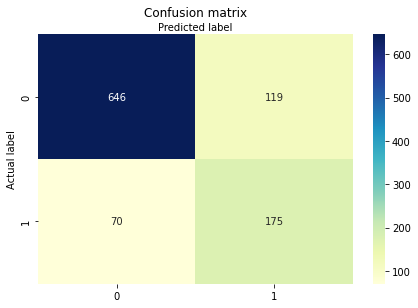

In [11]:
# Performance analysis 2 - Plot results
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
# Performance analysis 3 - Output results
print("")
print("###################################################################")
print("Metrics                                                            ")
print("###################################################################")
print("Accuracy:",metrics.accuracy_score(Y, Y_pred))
print("Precision:",metrics.precision_score(Y, Y_pred))
print("Recall:",metrics.recall_score(Y, Y_pred))

fpr, tpr, thresholds = metrics.roc_curve(Y, Y_pred, pos_label=1)
print("AUC: ", metrics.auc(fpr, tpr))


###################################################################
Metrics                                                            
###################################################################
Accuracy: 0.8225247524752475
Precision: 0.6228926353149956
Recall: 0.7062374245472837
AUC:  0.7833550878481659
